In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("incomesheet.csv")

In [79]:
df.head()

,name,income
0,John,100.0
1,Racob,120.0
2,Cucoon,210.0
3,Cain,0.0
4,Coc,12.3


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    220 non-null    object 
 1   income  212 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.6+ KB


In [81]:
df['income'].describe()

count       212.000000
mean       5481.373165
std       37677.812929
min           0.000000
25%         222.000000
50%         543.000000
75%         876.000000
max      436546.000000
Name: income, dtype: float64

In [82]:
df.isnull().sum()

name      0
income    8
dtype: int64

In [83]:
df.fillna(df.mean())
df.isnull().sum()

name      0
income    8
dtype: int64

In [84]:
df.income.quantile(0.75)

876.0

In [85]:
df.median()

income    543.0
dtype: float64

In [86]:
df.mode()

,name,income
0,David,777.0


Median or mode to fill in null values can be appropriate in certain situations, but it may not be the best approach if the distribution of the data is skewed or if there are outliers present. In this case, we can see that the data has a large standard deviation and the maximum value is much larger than the 75th percentile, indicating the presence of outliers.

Using the mean to fill in null values in this case would be more appropriate as it takes into account all the values in the dataset and is less sensitive to outliers than the median or mode.

# Use of Percentile to remove outliers

In [87]:
percentile_99 = df.income.quantile(0.99)
percentile_99

66397.40999999981

In [88]:
df[df.income> percentile_99]

,name,income
9,Selena,321536.0
18,Liam,436546.0
94,Collin,67890.0


In [89]:
df_without_outlier = df[df.income < percentile_99]
df_without_outlier

,name,income
0,John,100.0
1,Racob,120.0
2,Cucoon,210.0
3,Cain,0.0
4,Coc,12.3
...,...,...
214,Madeline,222.0
215,Madison,444.0
216,Makayla,555.0
217,Makenzie,777.0


In [90]:
df_without_outlier.isnull().sum()

name      0
income    0
dtype: int64

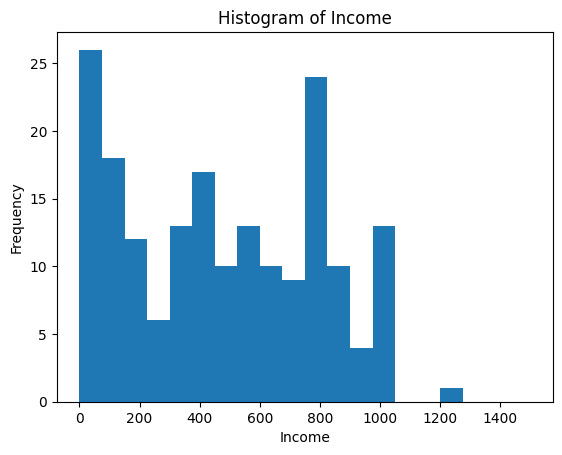

In [100]:
# create a histogram of the income column
plt.hist(df['income'], bins=20, range=(0, 1500))
# set the x and y axis labels and the title of the plot
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogram of Income')
# display the plot
plt.show()

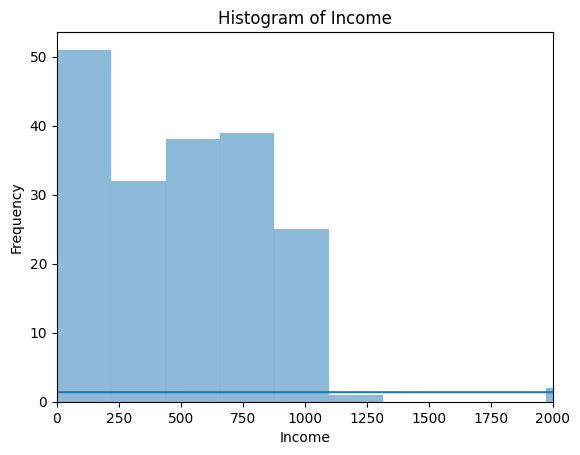

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a histogram of the income column with a KDE plot
ax = sns.histplot(df.income, kde=True)

# set the x-axis limits
ax.set_xlim(0, 2000)

# set the x and y axis labels and the title of the plot
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogram of Income')

# display the plot
plt.show()
